In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

In [36]:
key_features = pd.read_csv("Data/key_features.csv")

In [37]:
key_features.head()

,Unnamed: 0.1,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,0,0,3217,/m/014hr,"['army', 'of', 'darkness']",1992,21502796.0,81.0,['United States of America'],horror,...,0,0,0,0,0,0,0,0,0.0,0.5
1,1,1,3947,/m/0191n,"['blue', 'velvet']",1986,8551228.0,120.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
2,2,2,4231,/m/01cbx,"['buffy', 'the', 'vampire', 'slayer']",1992,16624456.0,86.0,['United States of America'],action,...,0,0,0,0,0,0,0,0,0.0,0.0
3,3,3,4728,/m/01hq1,"['batman', 'returns']",1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,...,1,0,0,0,0,0,0,0,0.0,0.0
4,4,4,5224,/m/01lsl,"['citizen', 'kane']",1941,1585634.0,119.0,['United States of America'],thriller,...,1,0,0,0,0,0,0,0,0.0,0.0


In [38]:
key_features.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Wikipedia_movie_ID', 'Freebase_movie_ID',
       'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue',
       'Movie_runtime', 'Movie_countries', 'Movie_main_genre',
       'Box_office_adjusted', 'Director', 'Audience_imdb_rating',
       'Audience_imdb_count', 'Budget', 'Character_in_title', 'Profit',
       'Budget_adjusted', 'Production Companies', 'Revenu_standardized',
       'Profit_standardized', 'imdb_rating_standardized', 'Success_indicator',
       'Actor_name', 'Freebase_character_ID', 'Famous_actors_count',
       'IsFamousStudio', 'IsFamousDirector', 'Budget_standardized',
       'Title_length', 'Title_characters', 'Nouns', 'Pronouns', 'Adjectives',
       'Verbs', 'Adverbs', 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY',
       'PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment'],
      dtype='object')

In [39]:
key_features_title = key_features[["Movie_name", "Success_indicator","Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME', 'MONEY','PERCENT', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

In [40]:
key_features_title

,Movie_name,Success_indicator,Title_length,Title_characters,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,"['army', 'of', 'darkness']",0.470781,3,16,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.500
1,"['blue', 'velvet']",0.551225,2,11,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2,"['buffy', 'the', 'vampire', 'slayer']",-0.453017,4,24,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.000
3,"['batman', 'returns']",1.779560,2,14,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
4,"['citizen', 'kane']",0.825333,2,12,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,"['the', 'pact']",-0.527991,2,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000
2626,"['moonshine', 'county', 'express']",-0.493803,3,24,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.0,0.000
2627,"['trading', 'mom']",-0.708376,2,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.000
2628,"['the', 'man', 'behind', 'the', 'gun']",-0.435199,5,22,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.0,0.375


In [41]:
#key_features_title["Success_indicator"] = np.floor(key_features_title["Success_indicator"]/100) +1

In [42]:
#key_features_title["Success_indicator"] = key_features_title["Success_indicator"].astype("int64")

In [43]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

In [44]:
for i in key_features_title.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            key_features_title[i] = normalize(key_features_title[i])

/tmp/ipykernel_91/908036668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features_title[i] = normalize(key_features_title[i])


In [45]:
key_features_title["neg_sentiment"]

0       1.826629
1      -0.378345
2      -0.378345
3      -0.378345
4      -0.378345
          ...   
2625   -0.378345
2626   -0.378345
2627   -0.378345
2628    1.275385
2629   -0.378345
Name: neg_sentiment, Length: 2630, dtype: float64

In [46]:
# Load the data
X = key_features_title[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title['Success_indicator']

In [13]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [i for i in range(1,20)]
precision_scores = []
recalls_scores = []

key_features_title_copy = key_features_title.copy(deep=True)

key_features_title_copy["Success_indicator"] = np.floor(key_features_title_copy["Success_indicator"]/100) +1
key_features_title_copy["Success_indicator"] = key_features_title_copy["Success_indicator"].astype("int64")

X = key_features_title_copy[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title_copy['Success_indicator']


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=20, random_state= 10, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=100, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=100, scoring="recall")
    recalls_scores.append(recall.mean())

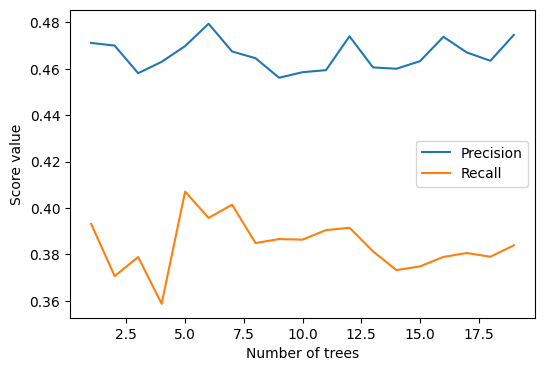

In [14]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

In [147]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Load the diabetes dataset
X = key_features_title[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

y = key_features_title['Success_indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [148]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150,200,300,400,500], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], 
    'max_leaf_nodes': [3, 6, 9, 12, 15, 18], 
}

random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestRegressor(max_depth=24, max_features='log2', max_leaf_nodes=15,
                      n_estimators=50)


In [152]:
rf_regressor_2 = RandomForestRegressor(max_depth=24, max_features='log2', max_leaf_nodes=15, n_estimators=300)
rf_regressor_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor_2.predict(X_test)

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5757677233891236


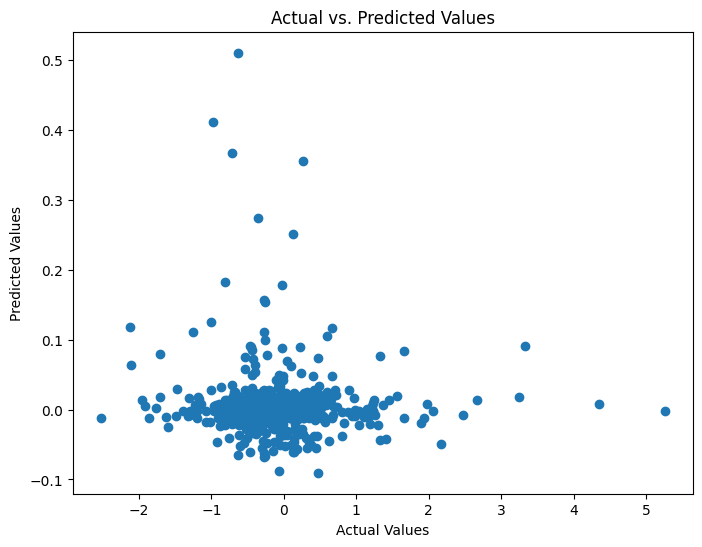

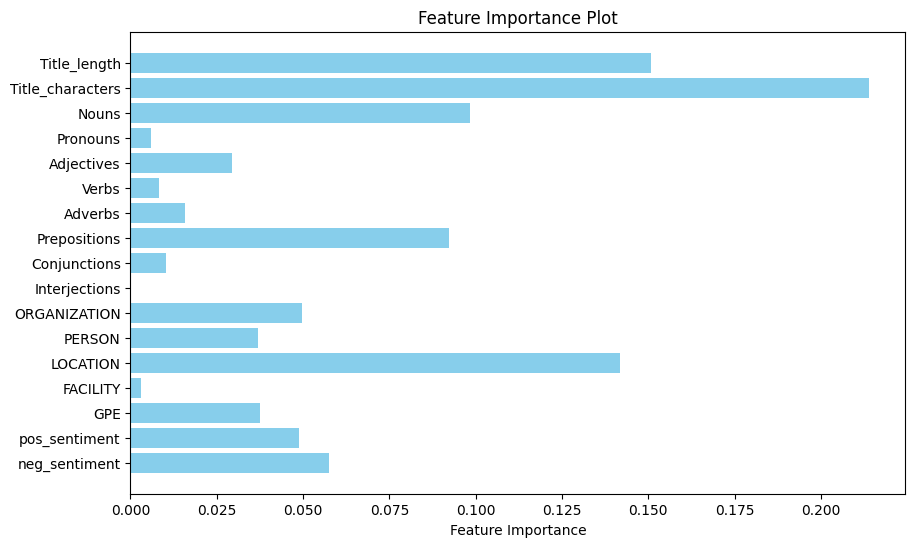

In [153]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Feature Importance Plot
feature_importance = rf_regressor_2.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import string
import requests
import matplotlib.pyplot as plt

In [107]:
ratings_imdb = pd.read_csv('Data/imdb_movies_post2010.csv',sep=";", on_bad_lines='skip')

In [108]:
ratings_imdb = ratings_imdb[ratings_imdb.orig_lang == ' English']
ratings_imdb['date'] = pd.to_datetime(ratings_imdb['date'])
ratings_imdb['date'] = ratings_imdb['date'].dt.year
ratings_imdb = ratings_imdb[ratings_imdb.date > 2012]
ratings_imdb.dropna(subset=['revenue',"score"],inplace=True)

ratings_imdb.columns

Index(['Title', 'date', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [109]:
ratings_imdb['revenue'] = ratings_imdb['revenue'].astype('float64')
ratings_imdb['revenue'] = np.floor(ratings_imdb['revenue'])
ratings_imdb = ratings_imdb[ratings_imdb['revenue']>0]

In [110]:
ratings_imdb['imdb_rating_standardized'] = (ratings_imdb['score']-ratings_imdb['score'].mean())/ ratings_imdb['score'].std()
ratings_imdb['Revenu_standardized'] = (ratings_imdb['revenue']-ratings_imdb['revenue'].mean())/ ratings_imdb['revenue'].std()

In [111]:
# Create an indicator for success, based on ratings and box office revenues
ratings_imdb["Success_indicator"]= (ratings_imdb['imdb_rating_standardized'] + ratings_imdb['Revenu_standardized'])/2
ratings_imdb.head()

,Title,date,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,imdb_rating_standardized,Revenu_standardized,Success_indicator
1,Seal Team,2021,71.0,"Animation, Family",After his best friend is killed in a shark att...,"Jessie T. Usher, Quinn (voice), J.K. Simmons, ...",Seal Team,Released,English,81300000.0,409447432.0,US,0.609541,0.422433,0.515987
2,Pieces of a Woman,2020,71.0,Drama,When a young mother's home birth ends in unfat...,"Vanessa Kirby, Martha Weiss, Shia LaBeouf, Sea...",Pieces of a Woman,Released,English,100000000.0,369861963.0,AU,0.609541,0.285928,0.447734
3,Abigail,2019,62.0,"Adventure, Fantasy, Mystery",A young girl Abigail lives in a city whose bor...,"Tinatin Dalakishvili, Эбигейл Фостер, Rinal Mu...",Abigail,Released,English,7000000.0,1940234.0,US,-0.053181,-0.982801,-0.517991
4,Taylor Swift: Reputation Stadium Tour,2018,83.0,Music,Taylor Swift takes the stage in Dallas for the...,"Taylor Swift, Self, Charli XCX, Self, Camila C...",Taylor Swift: Reputation Stadium Tour,Released,English,123000000.0,597125772.0,US,1.493170,1.069617,1.281393
5,Cake,2014,63.0,Drama,After having visions of a member of her suppor...,"Jennifer Aniston, Claire Bennett, Adriana Barr...",Cake,Released,English,7000000.0,2360281.0,US,0.020454,-0.981353,-0.480449


In [112]:
ratings_imdb = ratings_imdb[["Title", "date", "Success_indicator"]]
ratings_imdb.rename(columns={"Title": "Movie_name", "date": "Movie_release_date"}, inplace=True)

In [113]:
ratings_imdb.to_csv("Data/success_data_after_2012.csv")

In [154]:
test_movies_after_2012 = pd.read_csv("Data/key_features_after_2012.csv")

for i in test_movies_after_2012.columns:
    if i != "Movie_name":
        if i != "Success_indicator":
            test_movies_after_2012[i] = normalize(test_movies_after_2012[i])

X_test = test_movies_after_2012[["Title_length","Title_characters","Nouns","Pronouns","Adjectives","Verbs","Adverbs", 'Prepositions', 'Conjunctions', 'Interjections',
       'ORGANIZATION', 'PERSON', 'LOCATION', 'FACILITY', 'GPE', 'pos_sentiment', 'neg_sentiment']]

y_test = test_movies_after_2012['Success_indicator']

# Split the dataset into training and testing sets


In [155]:
# Make predictions on the test data
y_pred = rf_regressor_2.predict(X_test)

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5597833784426542


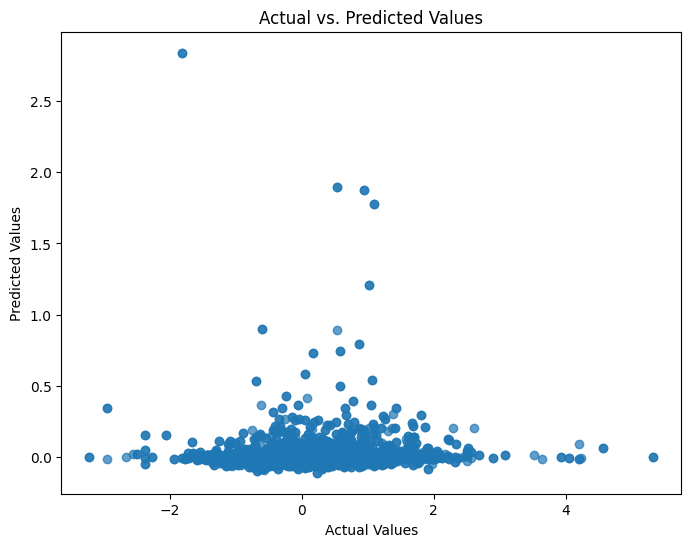

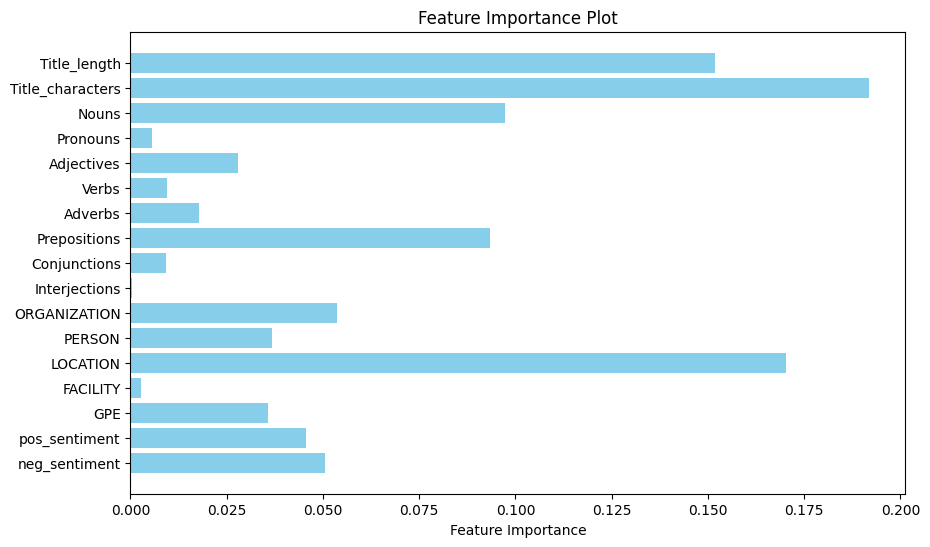

In [156]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# Feature Importance Plot
feature_importance = rf_regressor.feature_importances_
feature_names = X_test.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()